# XGBoost Test

This notebook will contain a sample use of the XGBoost library to determine feasibility in use for the study 

**[Evaluation and Comparison of Boosted ML Models in Behavior-Based Malware Detection]**

## GPU Support

XGBoost supports GPU accelerated computing albeit only at specific environments.

| Platform            | GPU | Multi-Node-Multi-GPU |
|---------------------|-----|----------------------|
| Linux x86_64        | ✔   | ✔                    |
| Linux aarch64       | ✘   | ✘                    |
| MacOS x86_64        | ✘   | ✘                    |
| MacOS Apple Silicon | ✘   | ✘                    |
| Windows             | ✔   | ✘                    |

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #For Splitting Datasets
from sklearn import preprocessing #For LabelEncoding
from sklearn.metrics import classification_report #For Classification Report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #For Confusion Matrix
import matplotlib.pyplot as plt #For figure plotting.
from sklearn.model_selection import RandomizedSearchCV #For automated hyperparameter tuning; Would be better if it was GridSearchCV

# 1. Installation

*This test will only use Python version of XGBoost. There are two ways it could be installed which are through Python's pip or Conda (via Anaconda). For this test we'll be using Python via Anaconda instead.*

## 1.1. via Python (used for this demo)

1. Open this link [XGBoost Install for Python](https://xgboost.readthedocs.io/en/stable/install.html#python)
2. Open your Anaconda Terminal
3. Enter `pip install xgboost` (Note that this is only for CPU XGBoost).

## 1.2. via Conda
1. Open Anaconda prompt
2. Install by entering `conda install -c conda-forge py-xgboost`
3. Alternatively, you can specify if the installation would be CPU-only or with **Nvidia** GPU support.
4. CPU only: `conda install -c conda-forge py-xgboost-cpu`
5. GPU support: `conda install -c conda-forge py-xgboost-gpu`

# 2. Verifying Library Installation

*As long as it does not show an error upon importing, it means that it works*

In [2]:
#Verifying installation of XGBoost
import xgboost as xgb

# 3. Sample Dataset

*For this sample, the [crops dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) similar in [this notebook](https://github.com/jm55/CSINTSY-MCO-5/blob/main/Machine%20Learning/notebook-v2.2.ipynb) will be ued in this demo.*

In [3]:
crops_df = pd.read_csv('crops_dataset.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Reminder

Note that the dataset is a multi-class dataset which means that the output is not simply 0 or 1 like the case of the official thesis document. Hence, there will be some differences in the real study.

# 4. Implementing XGBoost Classifier

*This demonstrates the use of the SKLearn like implementation/use of XGBoost with the other parameters as well as other related functions and properties is as shown in this [link](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)*.

Sample Complete Parameters (not all are included in the example):

`xgb.XGBClassifier(n_estimators=10, max_depth=10, max_leaves=0, max_bin=255, grow_policy=0.5, learning_rate=.001, verbosity=0, objective=None, booster='gbtree', tree_method='exact', n_jobs=-1, gamma=1.0, min_child_weight=0.0, max_delta_step='0.0', subsample=0.0, sampling_method='uniform', cosample_bytree=0.0, cosample_bylevel=0.0, cosample_bynode=0.0, reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=0.0, base_score=0.0, missing=np.nan, num_parallel_tree=0, monotone_constraints=None, interaction_constraints=None, importance_type='gain', gpu_id=None, validate_parameters=True, predictor='cpu_predictor', enable_categorical='False', objective='binary:logistic', use_label_encoder=None)`

## 4.1. Loading Classifier

In [4]:
#Loading XGBClassifier as an object
xgbclassifier = xgb.XGBClassifier()

## 4.2. Splitting Datasets to Train and Test Datasets

In [5]:
#Splitting datasets to train and test datasets
features = crops_df.columns.to_list()
features = features[0:len(features)-2]

le = preprocessing.LabelEncoder()
labels = le.fit_transform(crops_df['label']) #Converting t

X,y = crops_df[features],labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 4.3. Loading Hyperparameter Tuning

Refer to [this](https://xgboost.readthedocs.io/en/stable/parameter.html) in relation to [this](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier).

Note that the hyperparameter values shown in the tuning choices here are not complete as some values were ommited due to errors or to improve tuning speed relative to the available hardware. 

Booster `'dart'` may be better performing but at the extreme cost of time as tests suggests that it runs at ~30mins each iteration during RandomizedSearchCV, hence it was removed on this demo.

In [6]:
param = {'booster':['gbtree','gblinear'], 'tree_method':['exact','approx','hist'], 'n_jobs':[-1]}

tuner = RandomizedSearchCV(xgbclassifier, param, verbose=2, n_jobs=2, cv=5, refit=True, error_score=0, random_state=1)
tuner.fit(X_train,y_train)
print("Best Score:", tuner.best_score_)
print("Best Params:", tuner.best_params_)

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\ejose\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ejose\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ejose\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\ejose\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\Users\ejose\anaconda3\lib\site-packages\xgboost\core.py", line 620, in

Best Score: 0.9619318181818182
Best Params: {'tree_method': 'approx', 'n_jobs': -1, 'booster': 'gbtree'}


## 4.4. Loading Tuned Parameters to Model

In [7]:
#Reloading model with better parameters
xgbclassifier = xgb.XGBClassifier(**tuner.best_params_)

#Fitting/Training model
xgbclassifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## 4.5. Results

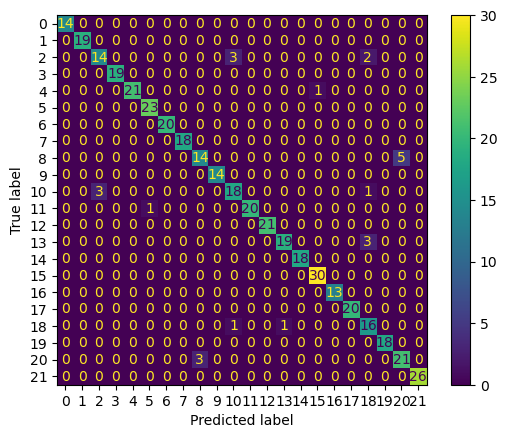

              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        14
      banana     1.0000    1.0000    1.0000        19
   blackgram     0.8235    0.7368    0.7778        19
    chickpea     1.0000    1.0000    1.0000        19
     coconut     1.0000    0.9545    0.9767        22
      coffee     0.9583    1.0000    0.9787        23
      cotton     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        18
        jute     0.8235    0.7368    0.7778        19
 kidneybeans     1.0000    1.0000    1.0000        14
      lentil     0.8182    0.8182    0.8182        22
       maize     1.0000    0.9524    0.9756        21
       mango     1.0000    1.0000    1.0000        21
   mothbeans     0.9500    0.8636    0.9048        22
    mungbean     1.0000    1.0000    1.0000        18
   muskmelon     0.9677    1.0000    0.9836        30
      orange     1.0000    1.0000    1.0000        13
      papaya     1.0000    

In [8]:
#Testing Predictions
y_pred = xgbclassifier.predict(X_test)

#Create confusion matrix
xg_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=xg_cm)
disp.plot()
plt.show()

#Converting LabelEncoded to String Labels
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

#Create classification report
xg_cr = classification_report(y_test_str, y_pred_str, digits=4)
print(xg_cr)

# 5. Saving and Loading Model

In [10]:
xgbclassifier.save_model("saved.json")

loaded_model = xgb.XGBClassifier()
loaded_model.load_model("saved.json")

y_pred = loaded_model.predict(X_test)

#Converting LabelEncoded to String Labels
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

#Create classification report
xg_cr = classification_report(y_test_str, y_pred_str, digits=4)
print(xg_cr)

              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        14
      banana     1.0000    1.0000    1.0000        19
   blackgram     0.8235    0.7368    0.7778        19
    chickpea     1.0000    1.0000    1.0000        19
     coconut     1.0000    0.9545    0.9767        22
      coffee     0.9583    1.0000    0.9787        23
      cotton     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        18
        jute     0.8235    0.7368    0.7778        19
 kidneybeans     1.0000    1.0000    1.0000        14
      lentil     0.8182    0.8182    0.8182        22
       maize     1.0000    0.9524    0.9756        21
       mango     1.0000    1.0000    1.0000        21
   mothbeans     0.9500    0.8636    0.9048        22
    mungbean     1.0000    1.0000    1.0000        18
   muskmelon     0.9677    1.0000    0.9836        30
      orange     1.0000    1.0000    1.0000        13
      papaya     1.0000    

# 6. Further Reading/Documentation/Examples

https://xgboost.readthedocs.io/en/stable/python/examples/index.html